In [1]:
import pandas as pd

In [2]:
# load the dataset
data = pd.read_csv('~/Documents/Raporty/Medium/Tesco_Stalowa_closed/tesco_users_data.csv', 
                   index_col='user_id')
data.head()


,Y,brands_visited,visits_n_beforeBiedronka,visits_n_beforeCarrefour,visits_n_beforeKaufland,visits_n_beforeLidl,visits_pct_beforeBiedronka,visits_pct_beforeCarrefour,visits_pct_beforeKaufland,visits_pct_beforeLidl,...,time_minBiedronka,time_minCarrefour,time_minKaufland,time_minLidl,time_minTesco,n_locationsBiedronka,n_locationsCarrefour,n_locationsKaufland,n_locationsLidl,n_locationsTesco
user_id,,,,,,,,,,,,,,,,,,,,,
502308,Lidl,4.0,3,0,0,16,0.150000,0.000000,0.000000,0.8,...,747.0,0.0,0.0,531.0,1019.0,2.0,0.0,0.0,2.0,1.0
511288,Lidl,4.0,1,0,46,0,0.018182,0.000000,0.836364,0.0,...,904.0,0.0,478.0,787.0,778.0,3.0,0.0,1.0,3.0,1.0
513284,Carrefour,2.0,0,10,0,0,0.000000,0.833333,0.000000,0.0,...,0.0,523.0,0.0,0.0,501.0,0.0,1.0,0.0,0.0,1.0
616687,Carrefour,4.0,0,2,2,0,0.000000,0.333333,0.333333,0.0,...,0.0,759.0,781.0,760.0,771.0,0.0,1.0,1.0,1.0,1.0
632801,Carrefour,2.0,0,1,0,0,0.000000,0.500000,0.000000,0.0,...,0.0,1073.0,0.0,0.0,1230.0,0.0,1.0,0.0,0.0,1.0


In [3]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(data.iloc[:, 1:], data.Y,
                                                     test_size=0.3,
                                                      random_state=1)


In [4]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

forest = Pipeline(steps = [('classfier', RandomForestClassifier(random_state=4))])
forest.fit(X_train, y_train)
forest_preds = forest.predict(X_valid)
print( 'Accuracy: {}'.format(accuracy_score(y_valid, forest_preds)))

Accuracy: 0.8504672897196262


In [5]:
# draw the tree
from sklearn.tree import export_graphviz

export_graphviz(forest.steps[0][1].estimators_[5], out_file='tree1.dot', 
                feature_names = X_train.columns.values,
                class_names = list(y_train.unique()),
                rounded = True, proportion = False, 
                precision = 2, filled = True)


In [22]:
feature_importances = pd.DataFrame(forest.steps[0][1].feature_importances_,
                                   index = X_train.columns,
                                    columns=['importance']).sort_values('importance',  ascending=False)
feature_importances

,importance
visits_pct_afterLidl,0.358757
visits_n_afterBiedronka,0.143576
visits_pct_afterCarrefour,0.134121
visits_n_afterLidl,0.114749
visits_pct_afterBiedronka,0.112750
visits_pct_afterKaufland,0.080042
visits_n_afterKaufland,0.056006


In [7]:
X_train, X_valid, y_train, y_valid = train_test_split(data.loc[:, feature_importances.index[:7]], data.Y,
                                                     test_size=0.3,
                                                      random_state=1)

In [18]:
forest = Pipeline(steps = [('classifier', RandomForestClassifier(n_estimators = 5, max_depth=3, 
                                                                bootstrap=False, random_state=4))])
forest.fit(X_train, y_train)
forest_preds = forest.predict(X_valid)
print( 'Accuracy: {}'.format(accuracy_score(y_valid, forest_preds)))


Accuracy: 0.7523364485981309


In [19]:
# rysuj drzewo
export_graphviz(forest.steps[0][1].estimators_[3], out_file='treex.dot', 
                feature_names = X_train.columns.values,
                class_names = ['Biedronka', 'Carrefour', 'Kaufland', 'Lidl'],
                rounded = True, proportion = False, 
                precision = 2, filled = True)


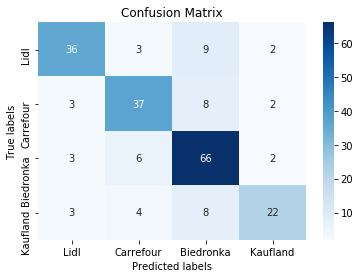

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

cm =  confusion_matrix(y_valid, forest_preds, labels=data.Y.unique())
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax, cmap="Blues")

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(data.Y.unique()); ax.yaxis.set_ticklabels(data.Y.unique());

In [21]:
from sklearn.metrics import classification_report
print(classification_report(y_valid, forest_preds))

              precision    recall  f1-score   support

   Biedronka       0.73      0.86      0.79        77
   Carrefour       0.74      0.74      0.74        50
    Kaufland       0.79      0.59      0.68        37
        Lidl       0.80      0.72      0.76        50

    accuracy                           0.75       214
   macro avg       0.76      0.73      0.74       214
weighted avg       0.76      0.75      0.75       214



ValueError: shape mismatch: objects cannot be broadcast to a single shape

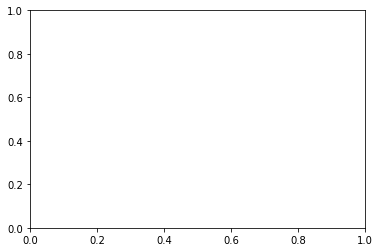

In [48]:
from treeinterpreter import treeinterpreter as ti
import numpy as np 

prediction, bias, contributions = ti.predict(forest.steps[0][1], X_valid[6:7])
N = 7 # no of entries in plot , 4 ---> features & 1 ---- class label

Lidl = []
Biedronka = []
Carrefour = []
Kaufland = []

for j in range(3):
    list_ =  [Lidl ,Biedronka ,Carrefour]
    for i in range(4):
        val = contributions[0,i,j]
        list_[j].append(val)
        
Lidl.append(prediction[0,0]/7)
Biedronka.append(prediction[0,1]/7)
Carrefour.append(prediction[0,2]/7)

fig, ax = plt.subplots()
ind = np.arange(N)   
width = 0.15        
p1 = ax.bar(ind, Lidl, width, color='red', bottom=0)
p2 = ax.bar(ind+width, Biedronka, width, color='green', bottom=0)
p3 = ax.bar(ind+ (2*width), Carrefour, width, color='yellow', bottom=0)

ax.set_title('Contribution of all feature for a particular \n sample of flower ')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels( X_train.columns, rotation = 90)
ax.legend((p1[0], p2[0] ,p3[0]), ('Lidl', 'Biedronka', 'Carrefour' ) , bbox_to_anchor=(1.04,1), loc="upper left")
ax.autoscale_view()
plt.show()

In [54]:
p = X_train.copy()
p['y'] = y_train
p.head()

,visits_pct_afterBiedronka,visits_pct_afterLidl,visits_pct_afterCarrefour,visits_pct_afterKaufland,visits_n_afterLidl,visits_n_afterBiedronka,visits_n_afterKaufland,y
user_id,,,,,,,,
5108018,0.318182,0.000000,0.318182,0.363636,0,7,8,Carrefour
4651963,0.000000,0.000000,1.000000,0.000000,0,0,0,Carrefour
3498148,0.000000,0.380952,0.619048,0.000000,24,0,0,Carrefour
2457479,0.142857,0.142857,0.714286,0.000000,1,1,0,Carrefour
4271899,0.283186,0.026549,0.044248,0.646018,3,32,73,Biedronka


In [58]:
p[(p.y=='Kaufland')&(p.visits_pct_afterLidl < 0.58)].groupby('y').agg(['min', 'max', 'count']).T

y                                 Kaufland
visits_pct_afterBiedronka min     0.000000
                          max     0.687500
                          count  64.000000
visits_pct_afterLidl      min     0.000000
                          max     0.500000
                          count  64.000000
visits_pct_afterCarrefour min     0.000000
                          max     0.750000
                          count  64.000000
visits_pct_afterKaufland  min     0.083333
                          max     1.000000
                          count  64.000000
visits_n_afterLidl        min     0.000000
                          max    11.000000
                          count  64.000000
visits_n_afterBiedronka   min     0.000000
                          max    18.000000
                          count  64.000000
visits_n_afterKaufland    min     1.000000
                          max    73.000000
                          count  64.000000